<a href="https://colab.research.google.com/github/deathstar1/Exploration/blob/main/CNNwithVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2020-10-20 14:20:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 2404:6800:4003:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   172MB/s    in 0.8s    

2020-10-20 14:20:05 (172 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [24]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip  -O /tmp/validation-horse-or-human.zip

--2020-10-20 14:23:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c03::80, 2404:6800:4003:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  17.5MB/s    in 0.6s    

2020-10-20 14:23:18 (17.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [13]:
import os
import zipfile 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip ,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [25]:
import os
import zipfile 
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip ,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [26]:
training_horses = os.path.join('/tmp/horse-or-human/horses')
training_humans = os.path.join('/tmp/horse-or-human/humans')
val_training_horses = os.path.join('/tmp/validation-horse-or-human/horses')
val_training_humans = os.path.join('/tmp/validation-horse-or-human/humans')

In [28]:
training_horse_img = os.listdir(training_horses)
print(training_horse_img)
training_human_img = os.listdir(training_humans)
print(training_human_img)
test_human_img = os.listdir(training_humans)
print(test_human_img)

['horse22-7.png', 'horse16-6.png', 'horse39-9.png', 'horse43-2.png', 'horse19-1.png', 'horse36-6.png', 'horse15-7.png', 'horse27-6.png', 'horse16-3.png', 'horse38-7.png', 'horse13-9.png', 'horse41-5.png', 'horse08-3.png', 'horse16-1.png', 'horse23-1.png', 'horse04-5.png', 'horse31-7.png', 'horse43-6.png', 'horse20-1.png', 'horse16-5.png', 'horse29-9.png', 'horse46-6.png', 'horse29-4.png', 'horse43-9.png', 'horse39-7.png', 'horse09-8.png', 'horse09-7.png', 'horse13-5.png', 'horse40-3.png', 'horse48-9.png', 'horse35-3.png', 'horse08-4.png', 'horse31-9.png', 'horse48-3.png', 'horse24-0.png', 'horse49-6.png', 'horse32-1.png', 'horse37-7.png', 'horse20-7.png', 'horse44-2.png', 'horse35-0.png', 'horse13-0.png', 'horse45-1.png', 'horse06-2.png', 'horse17-5.png', 'horse42-6.png', 'horse01-5.png', 'horse03-6.png', 'horse37-6.png', 'horse24-1.png', 'horse02-2.png', 'horse19-8.png', 'horse09-5.png', 'horse23-0.png', 'horse13-7.png', 'horse26-2.png', 'horse35-1.png', 'horse43-8.png', 'horse01-3.pn

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg

nrows = 4 
ncols = 4 

pix = 0

pix += 8
next_horse_pic = [os.path.join(training_horses,fname) for fname in  training_horse_img[pix -8 :pix ] ]
next_house_pic = [os.path.join(training_humans,fname) for fname in  training_human_img[pix-8 : pix ] ]
print(next_horse_pic)

['/tmp/horse-or-human/horses/horse22-7.png', '/tmp/horse-or-human/horses/horse16-6.png', '/tmp/horse-or-human/horses/horse39-9.png', '/tmp/horse-or-human/horses/horse43-2.png', '/tmp/horse-or-human/horses/horse19-1.png', '/tmp/horse-or-human/horses/horse36-6.png', '/tmp/horse-or-human/horses/horse15-7.png', '/tmp/horse-or-human/horses/horse27-6.png']


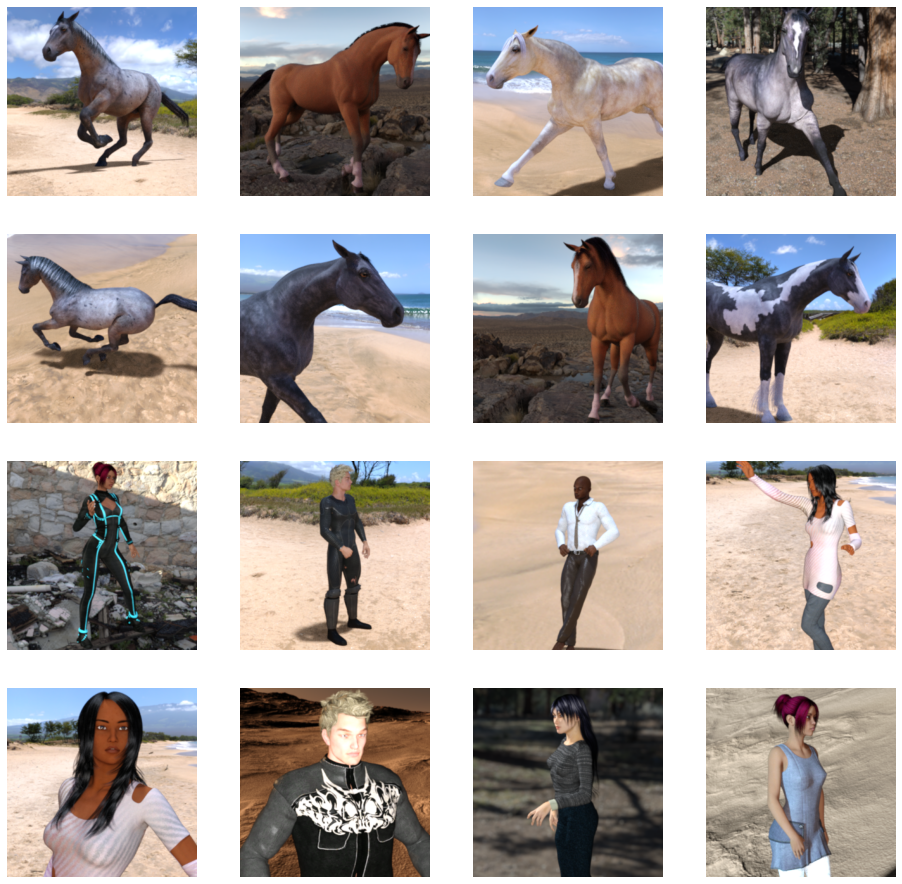

In [17]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4 , nrows *4)
for i , img_path in  enumerate(next_horse_pic+ next_house_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) , activation='relu' , input_shape =(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128 , (3,3) , activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128 , (3,3) , activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [21]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001) , loss='binary_crossentropy' , metrics =['accuracy'])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen =  ImageDataGenerator(rescale=1/255)

train_data =  train_gen.flow_from_directory('/tmp/horse-or-human', target_size=(300,300) , batch_size=128 ,  class_mode='binary')

test_gen =  ImageDataGenerator(rescale=1/255)
test_data =  test_gen.flow_from_directory('/tmp/validation-horse-or-human', target_size=(300,300) , batch_size=32 ,  class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [33]:
model.fit_generator(train_data ,steps_per_epoch=8,epochs=15, verbose=1, validation_data=test_data , validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 999ms/step - loss: 0.0407 - accuracy: 0.9863 - val_loss: 2.2779 - val_accuracy: 0.8242
Epoch 2/15
8/8 [==============================] - 7s 890ms/step - loss: 0.2765 - accuracy: 0.9344 - val_loss: 1.1788 - val_accuracy: 0.8672
Epoch 3/15
8/8 [==============================] - 7s 883ms/step - loss: 0.0690 - accuracy: 0.9744 - val_loss: 1.4687 - val_accuracy: 0.8672
Epoch 4/15
8/8 [==============================] - 7s 871ms/step - loss: 0.0271 - accuracy: 0.9900 - val_loss: 1.7992 - val_accuracy: 0.8672
Epoch 5/15
8/8 [==============================] - 7s 875ms/step - loss: 0.2709 - accuracy: 0.9366 - val_loss: 1.2752 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 7s 881ms/step - loss: 0.2267 - accuracy: 0.9477 - val_loss: 1.5550 - val_accuracy: 0.8359
Epoch 7/15
8/8 [==============================] - 7s 879ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 2.0672 - val_accuracy: 0.8477
Epoch 8/15
8/8 [====

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 2.jpg to 2.jpg
[0.]
2.jpg is a horse


[<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 149, 149, 32) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 147, 147, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 73, 73, 64) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 71, 71, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 35, 35, 64) dtype=float32>, <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 33, 33, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 16, 16, 128) dtype=float32>, <tf.Tensor 'conv2d_4/Relu:0' shape=(None, 14, 14, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(None, 7, 7, 128) dtype=float32>, <tf.Tensor 'flatten/Reshape:0' shape=(None, 6272) dtype=float32>, <tf.Tensor 'dense/Relu:0' shape=(None, 512) dtype=float32>, <tf.Tensor 'dense_1/Sigmoid:0' shape=(None, 1) dtype=float32>]
here


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


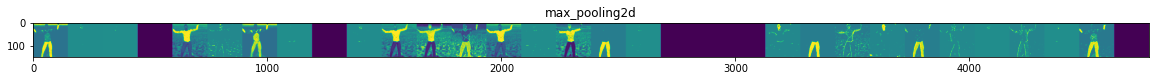

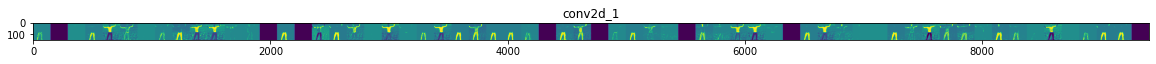

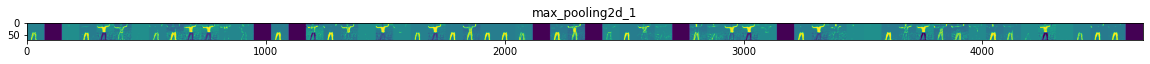

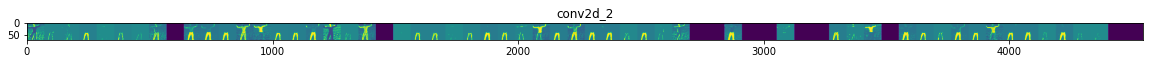

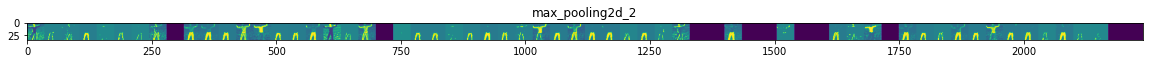

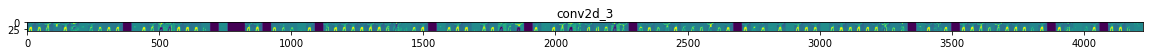

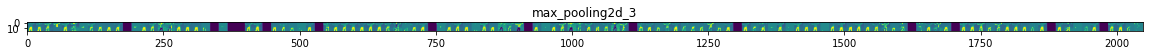

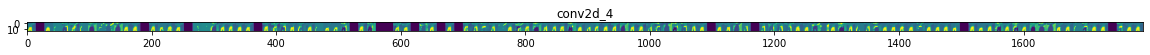

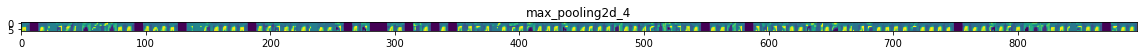

In [ ]:
from tensorflow.keras.models  import Model
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs =  [layer.output  for layer in  model.layers[1:]]
print (successive_outputs)

visualization_model =  Model(inputs = model.input , outputs = successive_outputs)

horse_file = [os.path.join(training_horses, f)  for f in  training_horse_img ]
human_file = [os.path.join(training_humans, f)  for f in  training_human_img ]

# random_select = random.choice(horse_file+human_file)
random_select = human_file[2]
img = load_img(random_select , target_size=(300,300))
x=  img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

successive_feature_maps=  visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]
print("here")
for layer_name , successive_feature_map  in zip(layer_names ,  successive_feature_maps):
  if len(successive_feature_map.shape) == 4 :
    n_features = successive_feature_map.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = successive_feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = successive_feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)